# Thomas Venant-Valéry

## Commandes utiles

In [85]:
import pandas as pd
import requests
from datetime import date, datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [6]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN
11911992,Bleu de Chanel: The Film,2018,1.0


In [13]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns = ['year', 'movie_count']
dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,movie_count
year,
1915,1
1916,1
1917,7
1918,10
1919,10
...,...
2016,15
2017,22
2018,20


In [15]:
dfStatsByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsByDirector

,0,1
0,"{'birthdate': '1899-08-13', 'name': 'Alfred Hi...",61
1,"{'birthdate': '1942-11-17', 'name': 'Martin Sc...",48
2,"{'birthdate': '1946-12-18', 'name': 'Steven Sp...",41
3,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",39
4,"{'birthdate': '1940-09-11', 'name': 'Brian De ...",38
5,"{'birthdate': '1937-11-30', 'name': 'Ridley Sc...",35
6,"{'birthdate': '1946-09-22', 'name': 'John Woo'...",34
7,"{'birthdate': '1969-10-09', 'name': 'Steve McQ...",31
8,"{'birthdate': '1959-10-23', 'name': 'Sam Raimi...",31
9,"{'birthdate': None, 'name': 'John Ford', 'id':...",20


In [25]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response
if response.status_code ==200:
    print('OK')
else:
    print('Error')

OK


In [26]:
data_json = response.json()
data_json

[[{'birthdate': '1899-08-13', 'name': 'Alfred Hitchcock', 'id': 33}, 61],
 [{'birthdate': '1942-11-17', 'name': 'Martin Scorsese', 'id': 217}, 48],
 [{'birthdate': '1946-12-18', 'name': 'Steven Spielberg', 'id': 229}, 41],
 [{'birthdate': '1930-05-31', 'name': 'Clint Eastwood', 'id': 142}, 39],
 [{'birthdate': '1940-09-11', 'name': 'Brian De Palma', 'id': 361}, 38],
 [{'birthdate': '1937-11-30', 'name': 'Ridley Scott', 'id': 631}, 35],
 [{'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247}, 34],
 [{'birthdate': '1969-10-09', 'name': 'Steve McQueen', 'id': 2588606}, 31],
 [{'birthdate': '1959-10-23', 'name': 'Sam Raimi', 'id': 600}, 31],
 [{'birthdate': None, 'name': 'John Ford', 'id': 406}, 20],
 [{'birthdate': '1961-10-31', 'name': 'Peter Jackson', 'id': 1392}, 19],
 [{'birthdate': '1956-10-20', 'name': 'Danny Boyle', 'id': 965}, 18],
 [{'birthdate': '1963-03-27', 'name': 'Quentin Tarantino', 'id': 233}, 14],
 [{'birthdate': '1954-08-16', 'name': 'James Cameron', 'id': 116}, 14]

In [28]:
# Liste de tuples
data_flatten = [(director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count) for director_dict, movie_count in data_json]

In [32]:
#Liste de dict
#data_flatten = [{'id':director_dict['id'], 'name':director_dict['name'], 'birthdate':director_dict['birthdate'], 'movie_count':movie_count} for director_dict, movie_count in data_json]
data_flatten = [{**director_dict, 'movie_count':movie_count} for director_dict, movie_count in data_json]

In [33]:
dfStatsByDirector = pd.DataFrame(data_flatten)
dfStatsByDirector

,birthdate,name,id,movie_count
0,1899-08-13,Alfred Hitchcock,33,61
1,1942-11-17,Martin Scorsese,217,48
2,1946-12-18,Steven Spielberg,229,41
3,1930-05-31,Clint Eastwood,142,39
4,1940-09-11,Brian De Palma,361,38
5,1937-11-30,Ridley Scott,631,35
6,1946-09-22,John Woo,247,34
7,1969-10-09,Steve McQueen,2588606,31
8,1959-10-23,Sam Raimi,600,31
9,None,John Ford,406,20


In [35]:
dfStatsByDirector.loc[0].birthdate

'1899-08-13'

In [57]:
dfStatsByDirector['birthdate'] = pd.to_datetime(dfStatsByDirector['birthdate'], format="%Y-%m-%d")
#dfStatsByDirector[~dfStatsByDirector.birthdate.isnull()].birthdate.apply(date.fromisoformat)
dfStatsByDirector.set_index('id', inplace=True)
dfStatsByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,61
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
2588606,1969-10-09,Steve McQueen,31
600,1959-10-23,Sam Raimi,31


In [63]:
limit = 1000
#, convert_dates['birthdate']
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}')
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,None
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,None
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


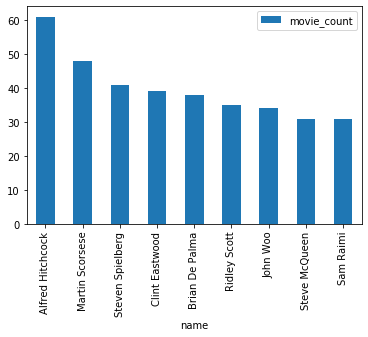

In [77]:
statsToPlot = dfStatsByDirector[dfStatsByDirector.movie_count > 30][['name', 'movie_count']].set_index('name')
statsToPlot.plot(kind='bar')

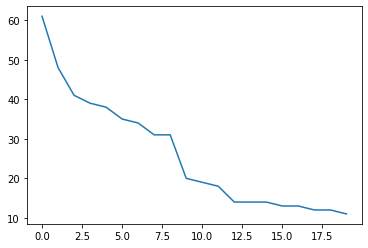

In [72]:
movie_count_ndarray = dfStatsByDirector.movie_count.values
plt.plot(movie_count_ndarray)
#plt.plot(dfStatsByDirector[dfStatsByDirector.movie_count > 30][['name', 'movie_count']].set_index('name'))

Text(0.5, 1.0, 'diag bar')

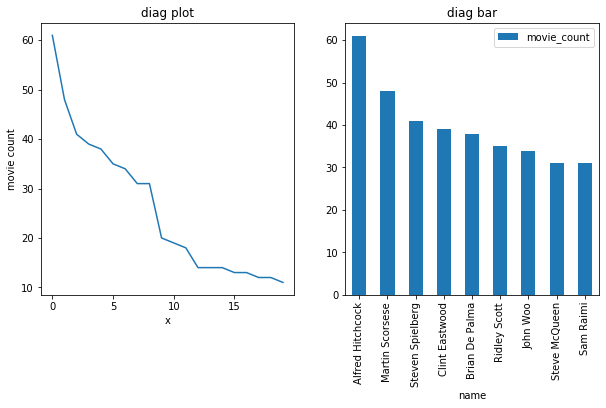

In [109]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title("diag plot")
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title("diag bar")

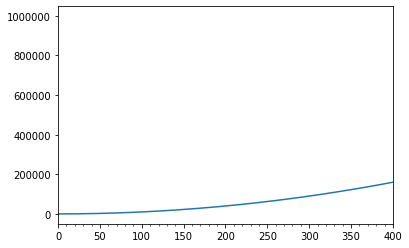

In [96]:
import numpy as np 
x = np.arange(1000)
y = x**2+1

fig, ax = plt.subplots()
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.plot(x,y)

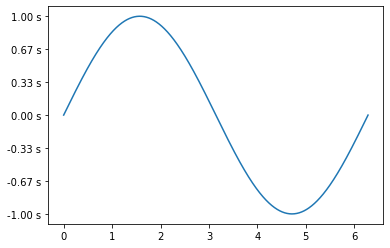

In [107]:
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)

fig, ax = plt.subplots()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1/3))
ax.plot(x,y)

In [110]:
#format et graduation datetime
mdates.YearLocator()
mdates.MonthLocator()
mdates.DayLocator()
mdates.DateFormatter('%Y-%m')

# TP

In [187]:
# Dataframe stars_by_birthyear

def show_stars_by_birthyear(year):
    dfStarsByBirthyear = pd.read_json(f'http://localhost:8000/stars/by_birthyear?year={year}')
    dfStarsByBirthyear.set_index('id', inplace=True)
    return dfStarsByBirthyear

# Select the year to see the stars born this year
show_stars_by_birthyear(1950)

,name,birthdate
id,,
648416,Afemo Omilami,1950-01-01
76988,Al Bernstein,1950-01-01
870257,Alan Toy,1950-01-01
636156,Alex Norton,1950-01-01
192233,Andy Cunningham,1950-01-01
...,...,...
570370,Tony McHale,1950-01-01
660425,Tony Papenfuss,1950-01-01
35932,Vaughn Armstrong,1950-01-01


In [247]:
# Dataframe numbre of stars born each year

dfStarsByYear = pd.DataFrame()

birth_years = dfStars[dfStars['birthdate'].notnull()].birthdate.str[:4]
L=[]
for e in birth_years:
    if not e in L:
        L.append(e)
L = list(map(int, L))
L.sort()
count_list = []
for y in L:
    count_list.append(len(show_stars_by_birthyear(y)))
dfStarsByYear['year'] = L
dfStarsByYear['nb_stars_born'] = count_list
dfStarsByYear

,year,nb_stars_born
0,1846,1
1,1848,2
2,1849,1
3,1850,1
4,1851,3
...,...,...
156,2004,1
157,2005,2
158,2006,1
159,2008,2


In [118]:
# Dataframe movies_by_title

def show_movies_by_part_title(part_title):
    dfMoviesByPartTitle = pd.read_json(f'http://localhost:8000/movies/by_parttitle?n={part_title}')
    dfMoviesByPartTitle.set_index('id', inplace=True)
    return dfMoviesByPartTitle

# Select the part_title to see the movies containing this part_title
show_movies_by_part_title("star")

,title,year,duration
id,,,
25830,The Star Packer,1934,53.0
49793,Star in the Dust,1956,80.0
76759,Star Wars: Episode IV - A New Hope,1977,121.0
80684,Star Wars: Episode V - The Empire Strikes Back,1980,124.0
86190,Star Wars: Episode VI - Return of the Jedi,1983,131.0
95405,Starry is the Night,1988,94.0
778043,Seeing Stars,1927,NaN
2488496,Star Wars: Episode VII - The Force Awakens,2015,138.0
2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0


In [124]:
# Dataframe stats_movies_by_actor

# Minimum number of films to play in
limit = 15

dfStatsMoviesByActor = pd.read_json(f'http://localhost:8000/stars/stats_movies_by_actor?minc={limit}')
response = requests.get(f'http://localhost:8000/stars/stats_movies_by_actor?minc={limit}')
data_json = response.json()
data_flatten = [{**actor_dict, 'movie_count':movie_count, 'first_movie_year':first_movie_year, 'last_movie_year':last_movie_year} for actor_dict, movie_count, first_movie_year, last_movie_year in data_json]
dfStatsMoviesByActor = pd.DataFrame(data_flatten)
dfStatsMoviesByActor.set_index('id', inplace=True)
dfStatsMoviesByActor

,birthdate,name,movie_count,first_movie_year,last_movie_year
id,,,,,
78,1907-05-26,John Wayne,172,1926,1976
1230,1884-03-16,Harrison Ford,86,1915,1932
125,1930-08-25,Sean Connery,73,1954,2012
230,1946-07-06,Sylvester Stallone,73,1969,2019
158,1956-07-09,Tom Hanks,69,1980,2020
...,...,...,...,...,...
740951,1948-01-01,Thomas Rosales Jr.,15,1978,2002
97647,1896-01-01,Danny Borzage,15,1939,1967
371025,1885-01-01,George 'Gabby' Hayes,15,1933,1944


Text(0.5, 1.0, 'Number of stars born by year')

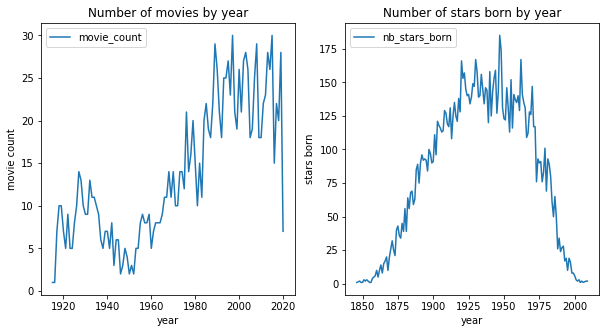

In [248]:
# Film by year & number of stars birthdates by year

dfStatsMoviesByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMoviesByYear.columns = ['year', 'movie_count']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
dfStatsMoviesByYear.plot(x='year', y='movie_count', ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('movie count')
ax1.set_title("Number of movies by year")
dfStarsByYear.plot(x='year', y='nb_stars_born', ax=ax2)
ax2.set_xlabel('year')
ax2.set_ylabel('stars born')
ax2.set_title("Number of stars born by year")

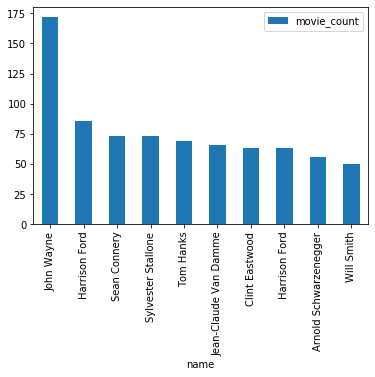

In [257]:
dfStatsMoviesByActor = dfStatsMoviesByActor[0:10]
dfStatsMoviesByActor['career_length'] = dfStatsMoviesByActor.apply(lambda row : row.last_movie_year - row.first_movie_year, axis=1)
dfStatsMoviesByActor.plot(x='name', y='movie_count', kind='bar')

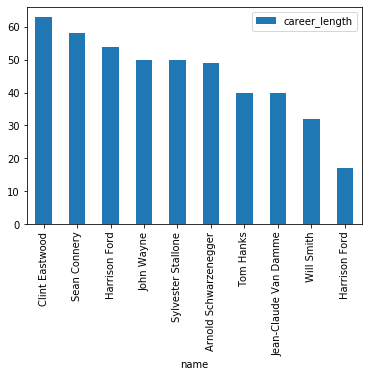

In [267]:
dfActorsCopy = dfStatsMoviesByActor.sort_values(by=['career_length'], ascending = False)
dfActorsCopy.plot(x='name', y='career_length', kind='bar')

Text(0, 0.5, 'year')

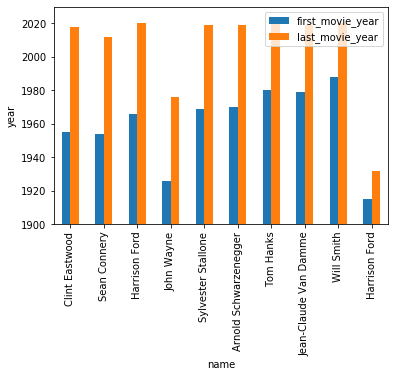

In [276]:
min_max_plot = dfActorsCopy.plot(x='name', y=['first_movie_year', 'last_movie_year'], kind='bar')
min_max_plot.set_ylim(1900,2030)
min_max_plot.set_ylabel("year")